# Imports and loading the biofilm images
loaded in a sample of 6 biofilms and their release cells to create a rough pipeline with the discrete cosine transform

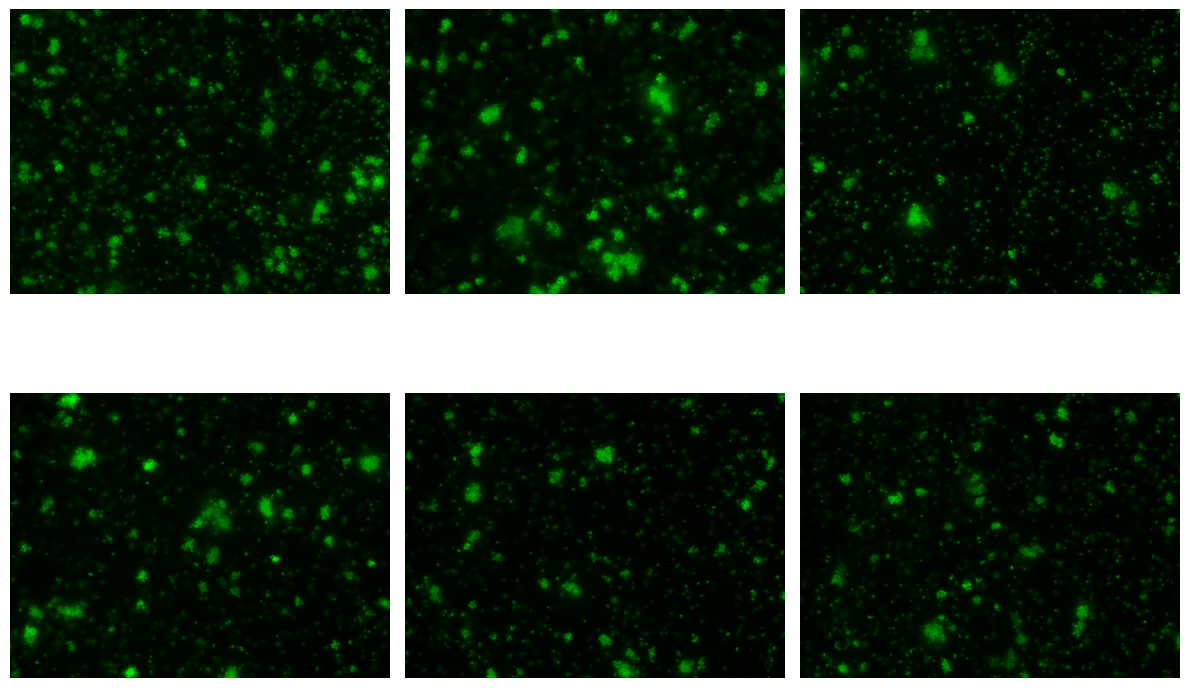

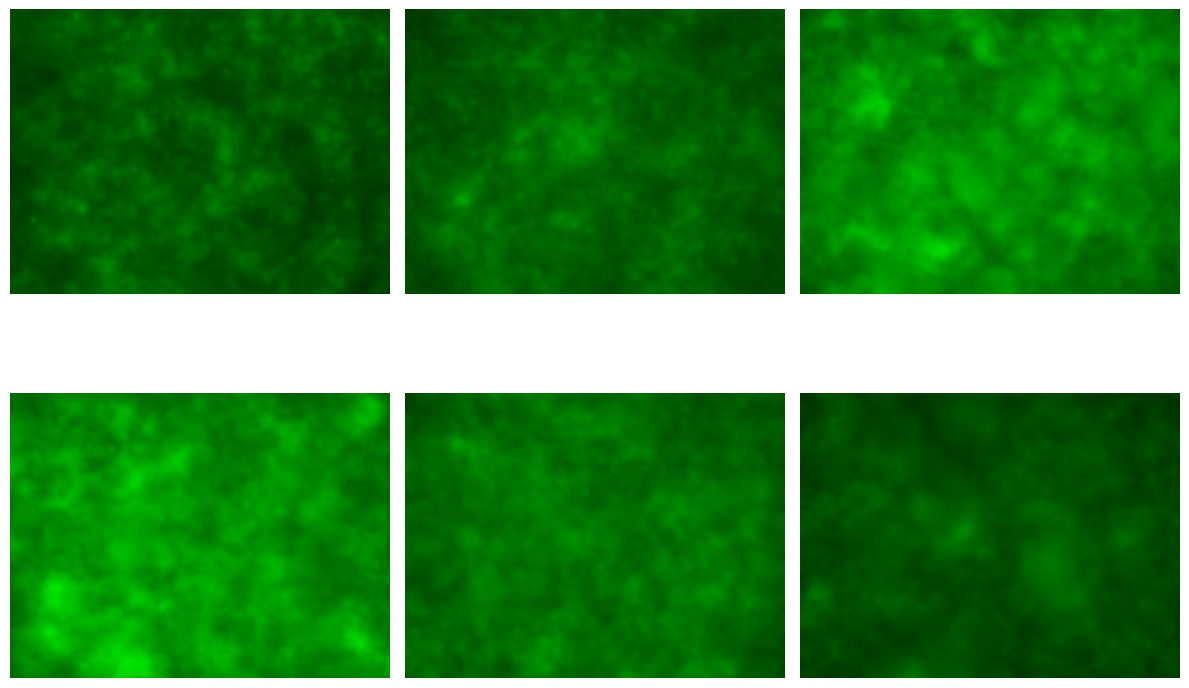

In [18]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path('vendor').resolve()))
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import scipy.fftpack
import glob
import importlib
import pywt
from utils import load_images, display_image, grayscale, normalize, display_grid_of_images, extract_patches
from utils import fft_dct, mexhat_transform, mexican_hat_function, gaussian_transform, fft_transform
from scipy.ndimage import gaussian_filter, gaussian_laplace, convolve

# Load and display release cell images
release_imgs = []
release_pre_imgs = load_images('biofilm_data/release_cells/Untreated')
display_grid_of_images(release_pre_imgs)
for i in range(len(release_pre_imgs)):
    z = grayscale(release_pre_imgs[i])
    z = normalize(z)
    release_imgs.append(z)


# Load and display biofilm images
biofilm_imgs = load_images('biofilm_data/biofilm/Untreated')
display_grid_of_images(biofilm_imgs)

## Fast Fourier Transformation
the fast fourier transformation, or commonly known as the abbreviation FFT. Took the release cells and transformed them into their FFT version of the images

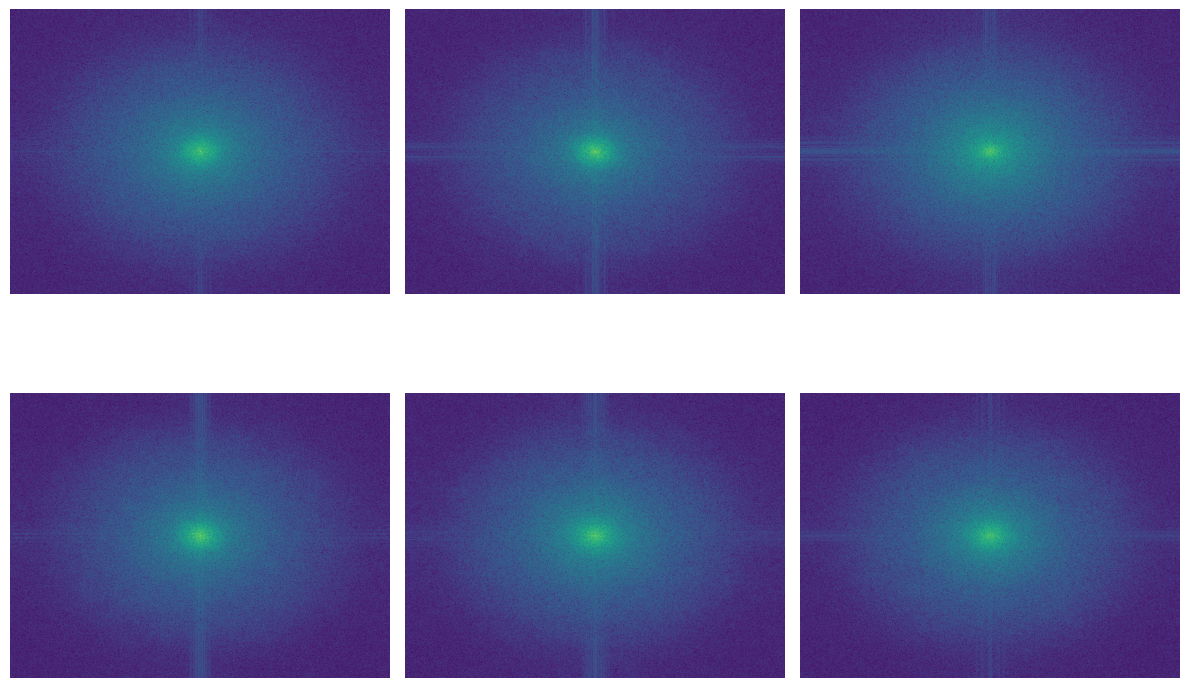

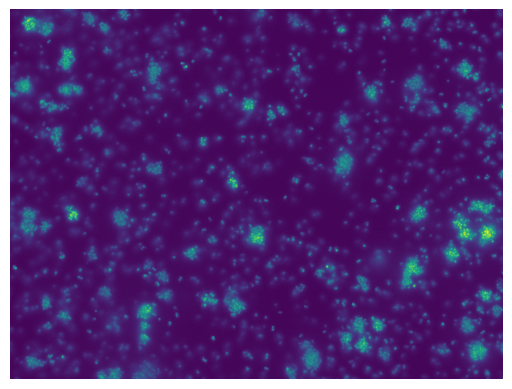

In [7]:
display_grid_of_images([fft_transform(img) for img in release_imgs])
display_image((release_imgs[0]))

## Discrete Cosine Transforming
Taking the loaded release cell images and transforming them using the discrete cosine transformation.

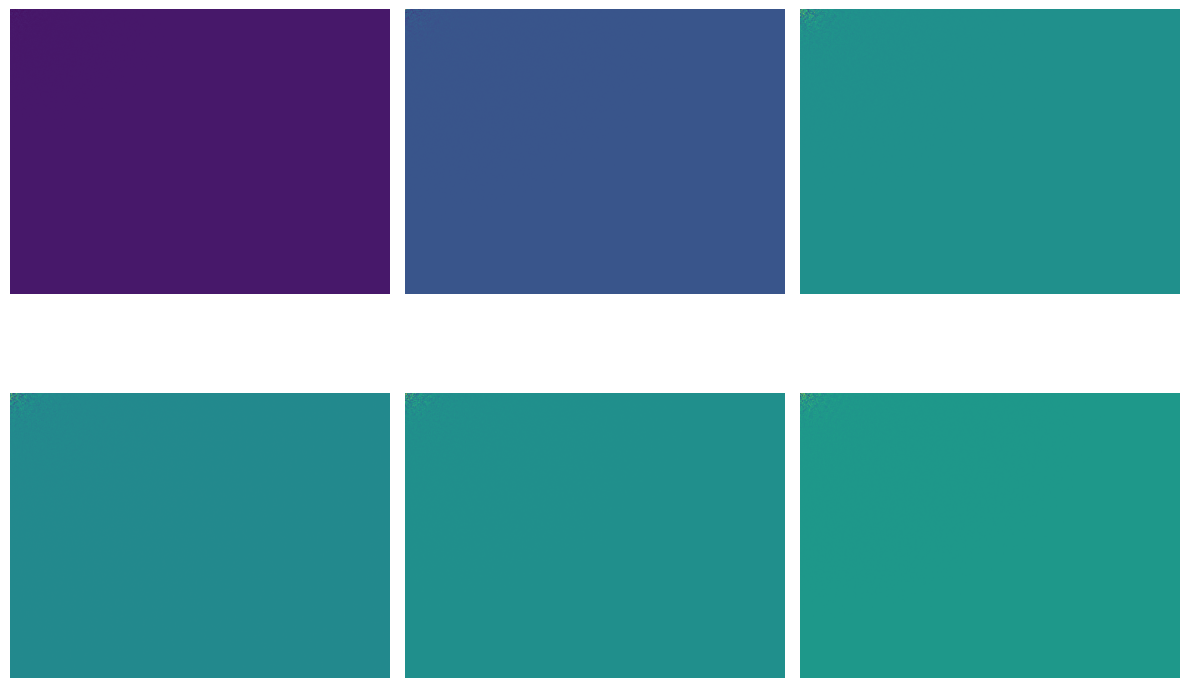

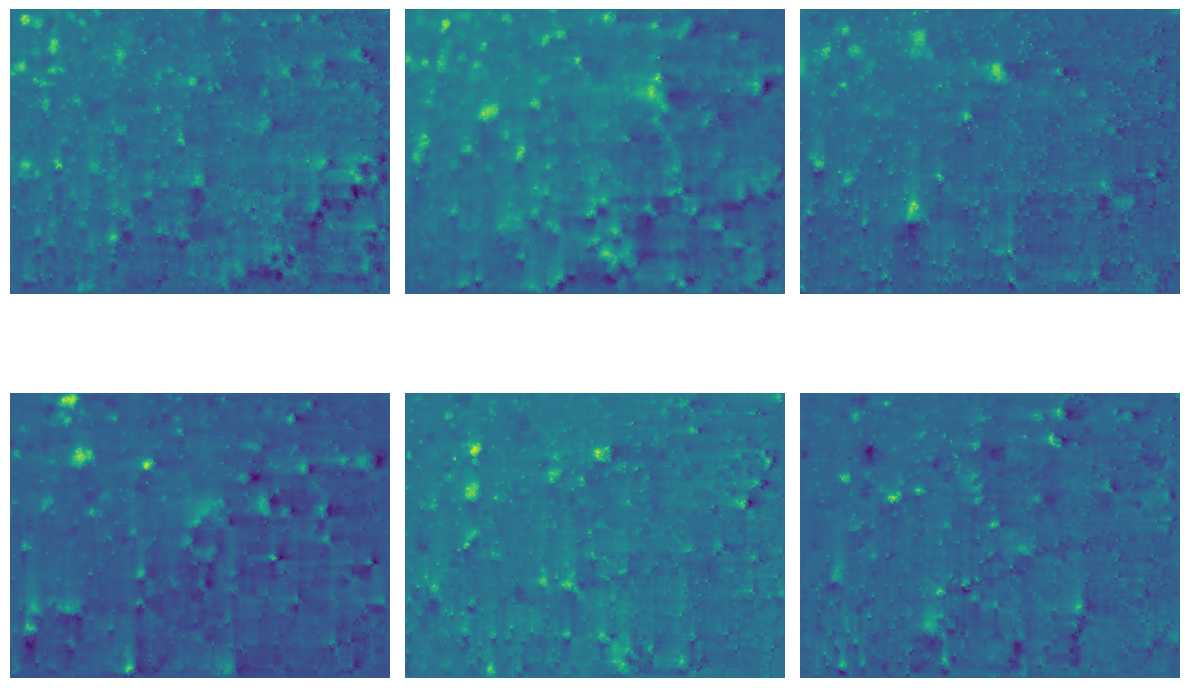

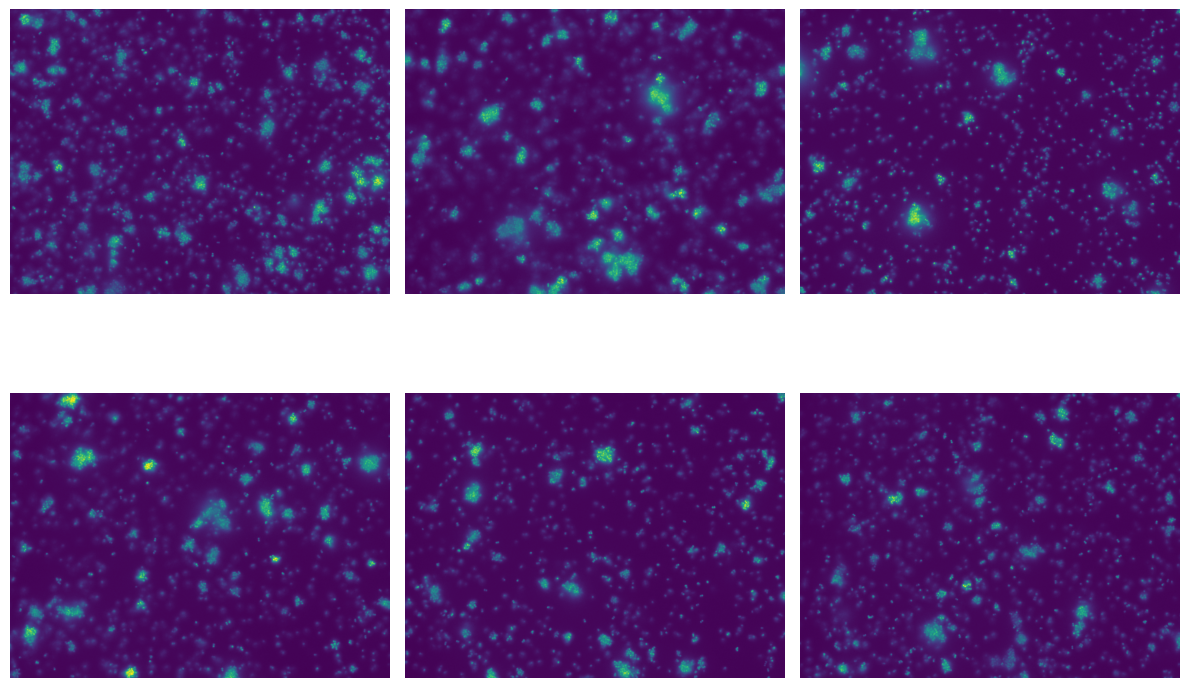

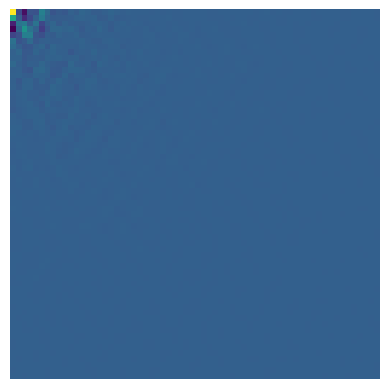

In [ ]:
display_grid_of_images(fft_dct(release_imgs))
display_grid_of_images(fft_dct(fft_dct(release_imgs)))
display_grid_of_images(release_imgs)

## Wavelet Transformation
The Wavelet Transformations come in multiple methods/styles. The ones used here are listed and labeled in the code

### Daubechies
Daubechies for images, notable the haar method is the same as using "db1". "db4" is being used as it is a common method for images in ML

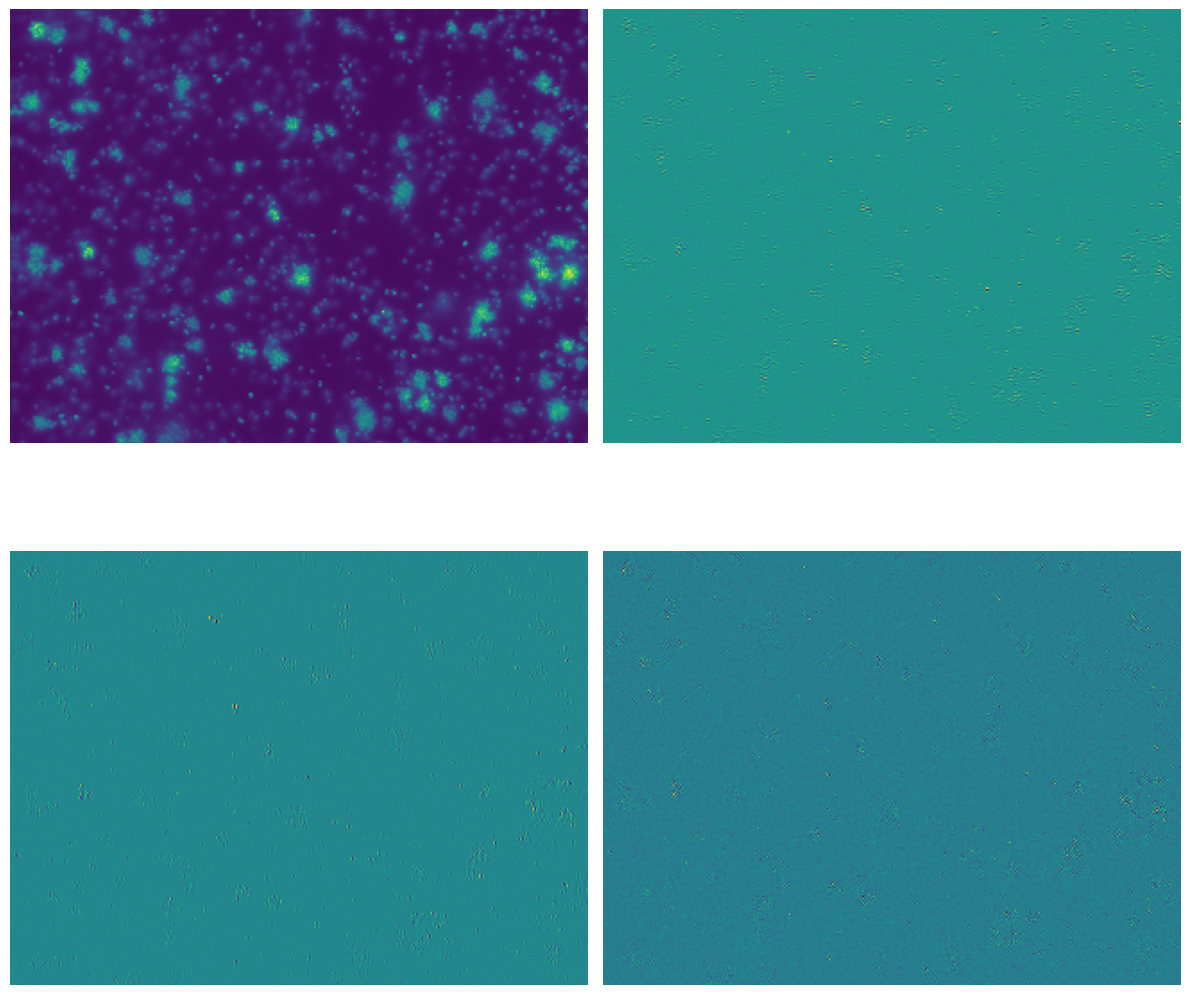

In [17]:
wavelet = "db4"
cA, (cH, cV, cD) = pywt.dwt2(release_imgs[0], wavelet)
display_grid_of_images([cA, cH, cV, cD])

### Gaussian
Laplacian of Gaussian and Gaussian blur.

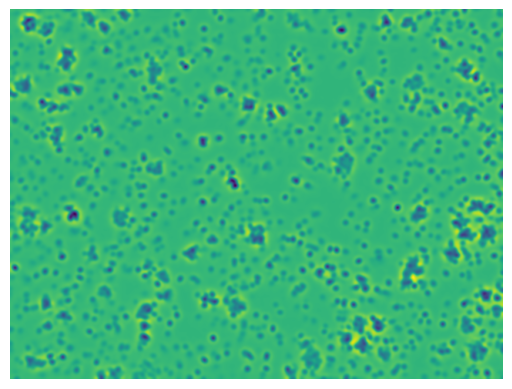

In [5]:
display_image(gaussian_transform(release_imgs[0]))

### Mexican Hat
the Mexican Hat wavelet which uses the formula (1 - r²/σ²) * exp(-r²/2σ²)

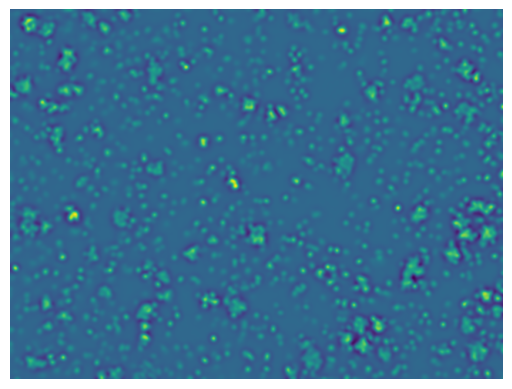

In [8]:
display_image(mexhat_transform(release_imgs[0]))
